In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as colors
import datetime as dt
from statistics import mode

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/data (1).csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data = data.dropna(axis='columns')

In [ ]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
diagnosis_unique = data.diagnosis.unique()

In [ ]:
diagnosis_unique

array(['M', 'B'], dtype=object)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Counts of Diagnosis", "Counts of Diagnosis"))

fig.add_trace(
    go.Histogram(x=data['diagnosis'], histnorm='', name='Diagnosis'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=data['diagnosis'].value_counts().index, y=data['diagnosis'].value_counts().values, name='Diagnosis'),
    row=1, col=2
)

fig.update_layout(title_text="Diagnosis Visualization", showlegend=False)
fig.show()

In [ ]:
fig = px.scatter_matrix(data_frame=data, dimensions=["radius_mean", "texture_mean", "perimeter_mean", "area_mean"],
                        color="diagnosis", title="Scatter Plot Matrix with Color-coded Diagnosis")

fig.show()

In [ ]:
size = len(data['texture_mean'])
area = np.pi * (15 * np.random.rand(size))**2
colors = np.random.rand(size)

fig = px.scatter(data_frame=data, x='texture_mean', y='radius_mean',
                 size=area, color=colors, opacity=0.5,
                 title="Scatter Plot with Varying Marker Sizes and Colors")

fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))

11


In [ ]:
data[cols].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


# **Model Building**

## **LogisticRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
lr_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_lr = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.9737


In [ ]:
classification_rep_lr = classification_report(y_test, lr_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_lr)

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
lr_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': lr_y_pred.flatten()
})

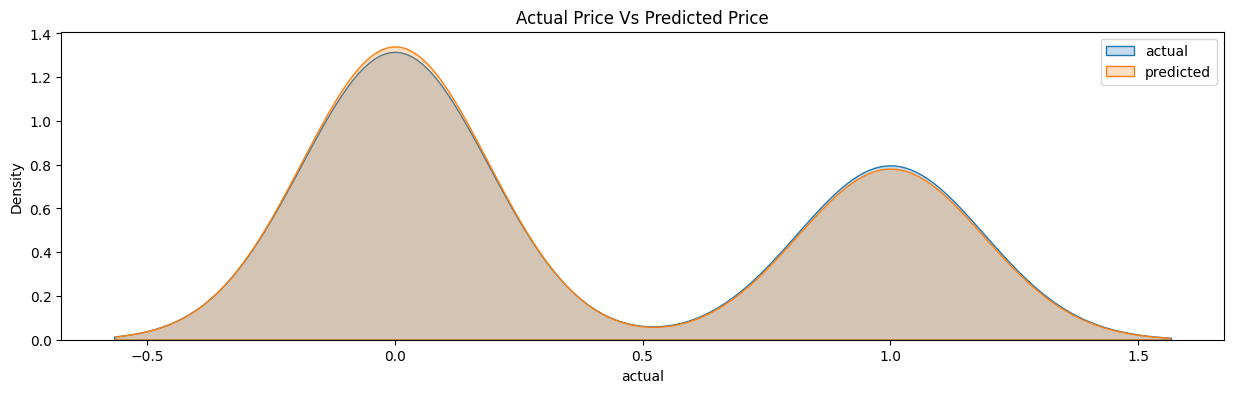

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

Accuracy: 0.9649


In [ ]:
classification_rep_rf = classification_report(y_test, rf_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_rf)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
rf_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': rf_y_pred.flatten()
})

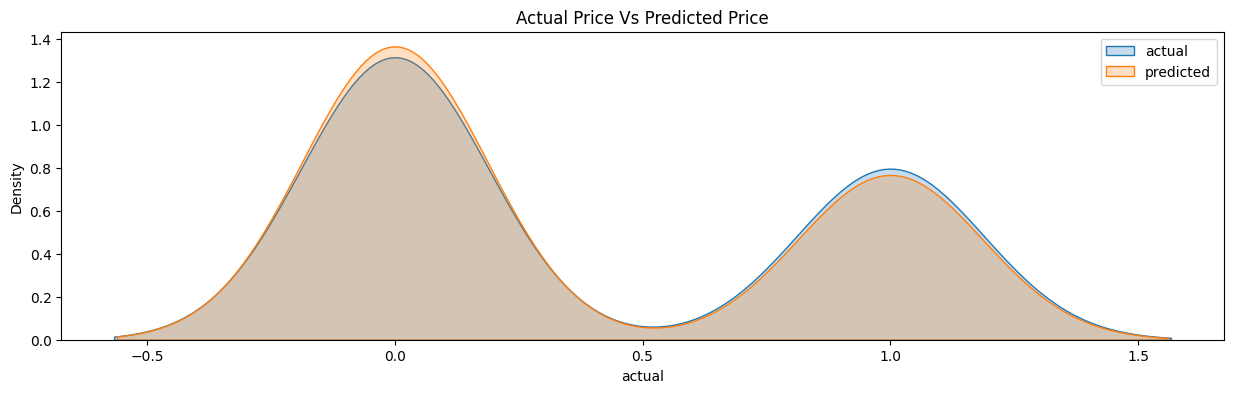

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=rf_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=rf_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
svc_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_svc = accuracy_score(y_test, svc_y_pred)
print(f"SVM Accuracy: {accuracy_svc:.4f}")

SVM Accuracy: 0.9825


In [ ]:
classification_rep_svc = classification_report(y_test, svc_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_svc)

Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
svc_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': svc_y_pred.flatten()
})

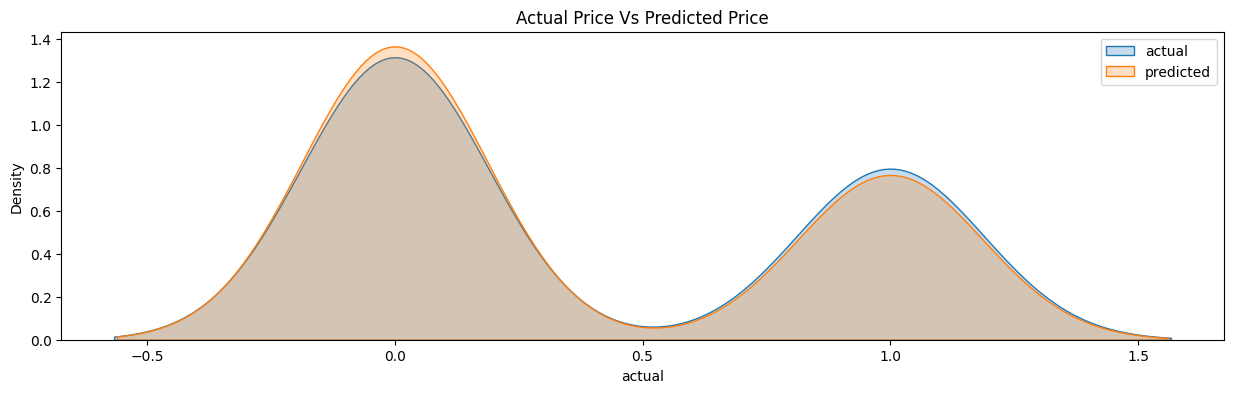

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=svc_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=svc_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_knn = accuracy_score(y_test, knn_y_pred)
print(f"k-NN Accuracy: {accuracy_knn:.4f}")

k-NN Accuracy: 0.9474


In [ ]:
classification_rep_knn = classification_report(y_test, knn_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_knn)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
knn_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': knn_y_pred.flatten()
})

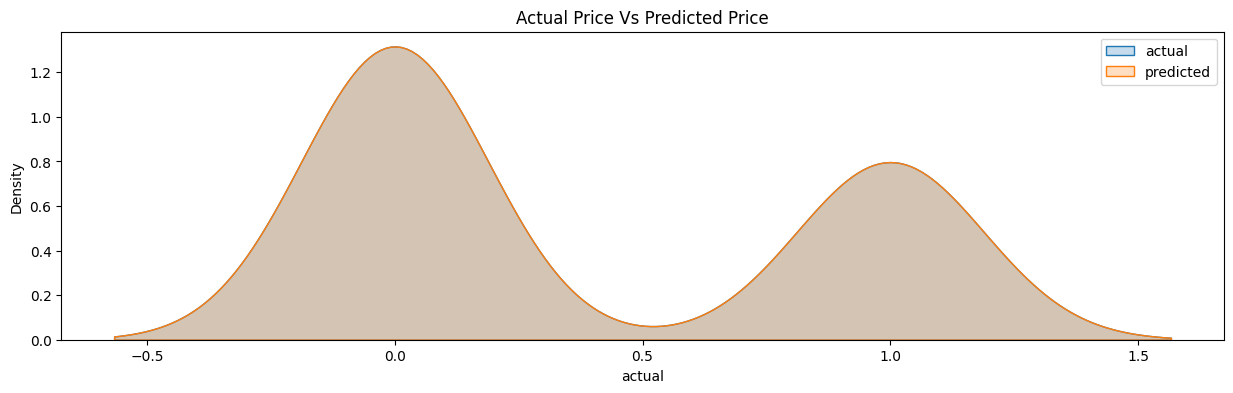

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=knn_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=knn_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
nb_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

Naive Bayes Accuracy: 0.9649


In [ ]:
classification_rep_nb = classification_report(y_test, nb_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_nb)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
nb_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': nb_y_pred.flatten()
})

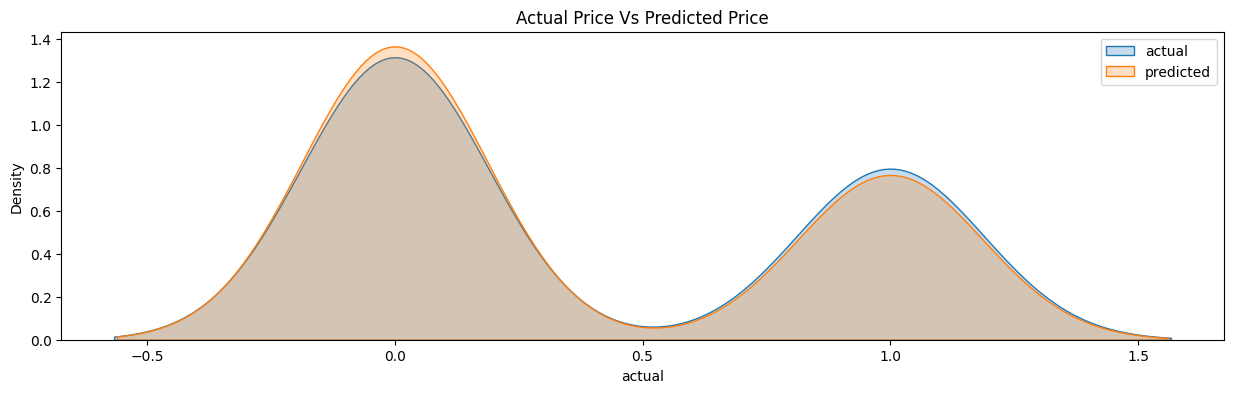

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=nb_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=nb_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gbc_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_gbc = accuracy_score(y_test, gbc_y_pred)
print(f"Gradient Boosting Accuracy: {accuracy_gbc:.4f}")

Gradient Boosting Accuracy: 0.9474


In [ ]:
classification_rep_gbc = classification_report(y_test, gbc_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_gbc)

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
gbc_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': gbc_y_pred.flatten()
})

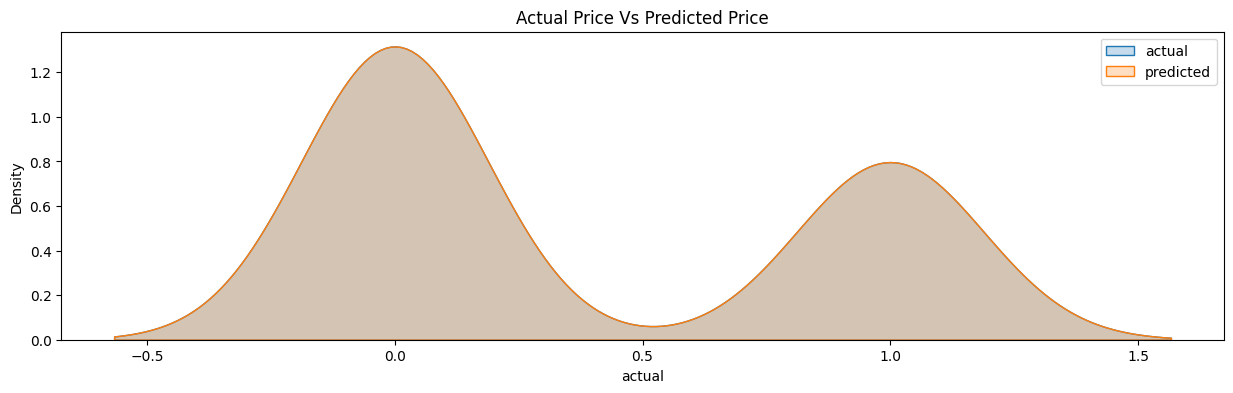

In [ ]:
plt.figure(figsize=(15, 4))
sns.kdeplot(data=gbc_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=gbc_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

## **Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

MLPClassifier(random_state=42)

In [ ]:
nnc_y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy_nnc = accuracy_score(y_test, nnc_y_pred)
print(f"Neural Network Accuracy: {accuracy_nnc:.4f}")

Neural Network Accuracy: 0.9737


In [ ]:
classification_rep_nnc = classification_report(y_test, nnc_y_pred, target_names=labelencoder_Y.classes_)
print("Classification Report:\n", classification_rep_nnc)

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Create a dataframe with actual and predicted values
nnc_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': nnc_y_pred.flatten()
})

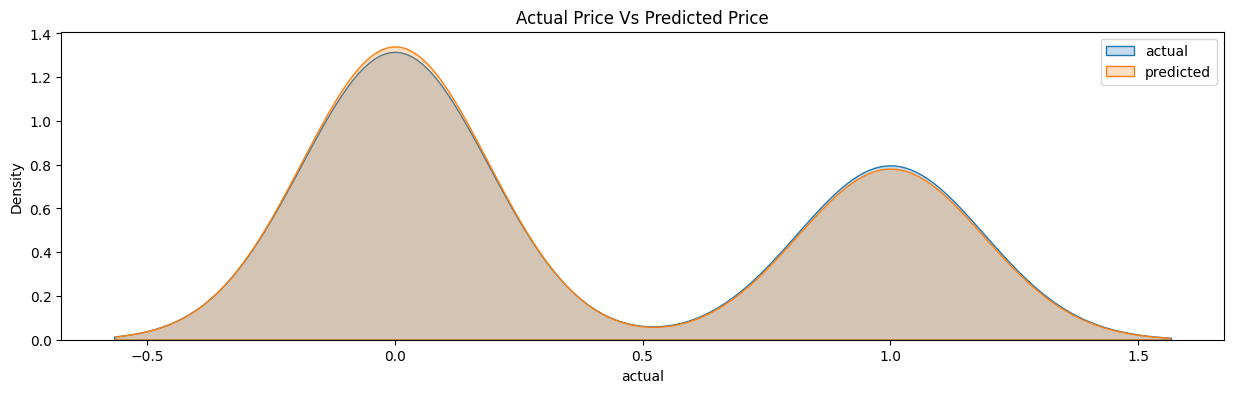

In [ ]:
# Plot the actual vs predicted prices
plt.figure(figsize=(15, 4))
sns.kdeplot(data=nnc_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=nnc_prediction, x='predicted', label='predicted', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# **Comparison Model**

## **Model Comparison: Accuracy Scores**

In [ ]:
model_names = ["Logistic Regression", "Random Forest", "SVM", "k-NN", "Naive Bayes", "Gradient Boosting", "Neural Network"]
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_gbc, accuracy_nnc]

In [ ]:
fig = px.line(x=model_names, y=accuracy_scores, title='Model Comparison: Accuracy Scores')
fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy')
fig.show()

Data for the accuracy comparison table

In [ ]:
model_names = ["Logistic Regression", "Random Forest", "SVM", "k-NN", "Naive Bayes", "Gradient Boosting", "Neural Network"]
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_gbc, accuracy_nnc]

Create a DataFrame for the table

In [ ]:
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

Create a table using Plotly

In [ ]:
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Model', 'Accuracy']),
    cells=dict(values=[accuracy_df.Model, accuracy_df.Accuracy])
)])

Update table layout for better formatting

In [ ]:
table_fig.update_layout(
    title='Model Comparison: Accuracy Scores',
    margin=dict(l=0, r=0, t=40, b=0),
)

table_fig.show()

## **Model Comparison: Classification Report**

Classification report data for each model

In [ ]:
classification_reports = {
    "Logistic Regression": classification_rep_lr,
    "Random Forest": classification_rep_rf,
    "SVM": classification_rep_svc,
    "k-NN": classification_rep_knn,
    "Naive Bayes": classification_rep_nb,
    "Gradient Boosting": classification_rep_gbc,
    "Neural Network": classification_rep_nnc
}

Parse classification report strings and create a DataFrame

In [ ]:
report_data = []
for model, report in classification_reports.items():
    lines = report.split('\n')
    precision, recall, f1, support = [float(val) for val in lines[-2].split()[-4:]]
    report_data.append({'Model': model, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Support': support})

report_df = pd.DataFrame(report_data)

Create a table using Plotly

In [ ]:
table_fig = go.Figure(data=[go.Table(
    header=dict(values=['Model', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[report_df['Model'],
                        report_df['Precision'].round(4),
                        report_df['Recall'].round(4),
                        report_df['F1-Score'].round(4),
                        report_df['Support']])
)])

Update table layout for better formatting

In [ ]:
table_fig.update_layout(
    title='Model Comparison: Classification Report',
    margin=dict(l=0, r=0, t=40, b=0),
)

table_fig.show()

# **Conclusion**

### ***Based on the performance evaluation of various machine learning models on the given dataset, the following conclusions can be gleaned:***


*   Support Vector Classifier (SVC) demonstrates the highest accuracy of 98.25%, showcasing its ability to effectively classify the data points.
*   Logistic Regression and Neural Network both exhibit strong accuracy at 97.37%, highlighting their proficiency in capturing complex relationships within the data.
*   Naive Bayes and Random Forest models share a commendable accuracy of 96.49%, signifying their reliable performance in diverse scenarios.
*   K-Nearest Neighbors (KNN) and Gradient Boosting achieve competitive accuracies of 94.74%, showcasing their competence in predictive tasks.
*   The overall results underline the significance of employing a variety of models to account for different data characteristics and patterns.
*   SVC's exceptional accuracy suggests its suitability for scenarios demanding precise classification, while Logistic Regression and Neural Network also emerge as robust contenders.
*   Naive Bayes and Random Forest demonstrate consistent and balanced performance, making them suitable choices for general-purpose classification.
*   KNN and Gradient Boosting, despite slightly lower accuracy, still exhibit noteworthy potential and could be fine-tuned for improved results.
*   Further exploration is recommended to understand the models' performance across different metrics and datasets to ensure robustness and generalizability.
*   In conclusion, a diverse ensemble of models, led by SVC, offers a comprehensive toolkit for tackling classification tasks with a focus on accuracy and efficiency.









